<a href="https://colab.research.google.com/github/mendoza7788/data_exploration_operational_pipelines/blob/main/20230322_OTA_valves_open.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
!pip install openpyxl pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the file path to the .csv file in your Google Drive
file_path = '/content/all_open_valves.xlsx'

# Read the dataset from the file
df = pd.read_excel(file_path, engine='openpyxl')

# Check column names in the DataFrame
print(df.columns)

# Display the first few rows
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
Index(['dist[km]', 'pgeo[psi]', 'pint+geo[psi]', 'pint[psi]'], dtype='object')


,dist[km],pgeo[psi],pint+geo[psi],pint[psi]
0,0.000000,487.273747,1030.492808,543.219061
1,0.004156,487.264686,1030.492808,543.228122
2,0.148922,473.959245,1030.492808,556.533563
3,0.341791,475.818045,1030.492808,554.674762
4,0.551865,468.063118,1030.492808,562.429689


In [4]:
# Create a DataFrame with the given data
valve_data = pd.DataFrame({
    'Valve Number': list(range(1, 20)),
    'Valve Name': ['Cusungo', 'San Juan1', 'San Juan 2', 'San Ramón', 'El Alto /Amarillo', 'El Guabo', 'Monterrey', 'Betania', 'Chucunez', 'Ospina Perez', 'Junín', 'Pailon', 'La Guayacana', 'Llorente', 'Hacienda Escocia', 'Pueblo Nuevo', 'Chilvisito', 'Aguas Claras', 'Camaroneras'],
    'dist': [89.435, 97.422, 98.168, 119.433, 130.334, 141.053, 144.155, 150.602, 164.052, 174.045, 193.367, 210.505, 226.975, 244.629, 258.797, 272.353, 283.78, 296.328, 300.533],
})

# Function to interpolate values
def interpolate_values(dist, column_name, data_df):
    data_df_no_duplicates = data_df.drop_duplicates(subset='dist[km]').sort_values(by='dist[km]').set_index('dist[km]')
    temp_df = data_df_no_duplicates.reindex(data_df_no_duplicates.index.union([dist])).sort_index()
    temp_df[column_name] = temp_df[column_name].interpolate(method='index')
    return temp_df.loc[dist, column_name]

# Apply the function to the valve_data DataFrame
valve_data['Interpolated pint+geo[psi]'] = valve_data['dist'].apply(lambda x: interpolate_values(x, 'pint+geo[psi]', df))
valve_data['Interpolated pint[psi]'] = valve_data['dist'].apply(lambda x: interpolate_values(x, 'pint[psi]', df))

# Display the valve_data DataFrame with the new columns
print(valve_data)


    Valve Number         Valve Name     dist  Interpolated pint+geo[psi]  \
0              1            Cusungo   89.435                 4220.538732   
1              2          San Juan1   97.422                 4220.538732   
2              3         San Juan 2   98.168                 4220.538732   
3              4          San Ramón  119.433                 4220.538732   
4              5  El Alto /Amarillo  130.334                 4220.471929   
5              6           El Guabo  141.053                 2662.175320   
6              7          Monterrey  144.155                 2473.255147   
7              8            Betania  150.602                 2193.840538   
8              9           Chucunez  164.052                 1716.510599   
9             10       Ospina Perez  174.045                 1716.510599   
10            11              Junín  193.367                 1439.893604   
11            12             Pailon  210.505                  833.611304   
12          

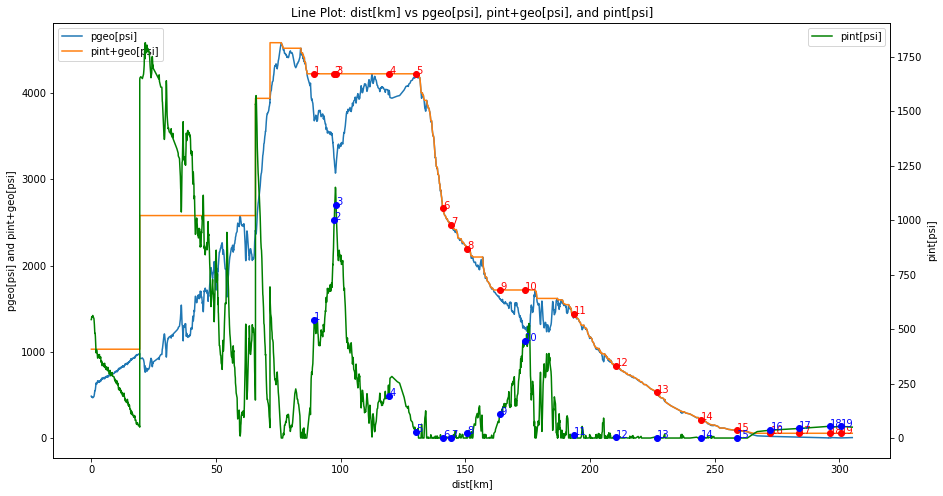

In [5]:
import matplotlib.pyplot as plt

# Create the line plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot pgeo[psi] and pint+geo[psi] on the first Y-axis
ax1.plot(df['dist[km]'], df['pgeo[psi]'], label='pgeo[psi]')
ax1.plot(df['dist[km]'], df['pint+geo[psi]'], label='pint+geo[psi]')

# Plot pint[psi] on the second Y-axis
ax2 = ax1.twinx()
ax2.plot(df['dist[km]'], df['pint[psi]'], color='g', label='pint[psi]')

# Plot the valve markers with numbers and legends over pint+geo[psi] and pint[psi]
for idx, row in valve_data.iterrows():
    ax1.plot(row['dist'], row['Interpolated pint+geo[psi]'], 'ro')
    ax1.text(row['dist'], row['Interpolated pint+geo[psi]'], str(row['Valve Number']), fontsize=10, color='r')
    ax2.plot(row['dist'], row['Interpolated pint[psi]'], 'bo')
    ax2.text(row['dist'], row['Interpolated pint[psi]'], str(row['Valve Number']), fontsize=10, color='b')

# Set the labels and title
ax1.set_xlabel('dist[km]')
ax1.set_ylabel('pgeo[psi] and pint+geo[psi]')
ax2.set_ylabel('pint[psi]')
plt.title('Line Plot: dist[km] vs pgeo[psi], pint+geo[psi], and pint[psi]')

# Add legends for the lines and valves
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

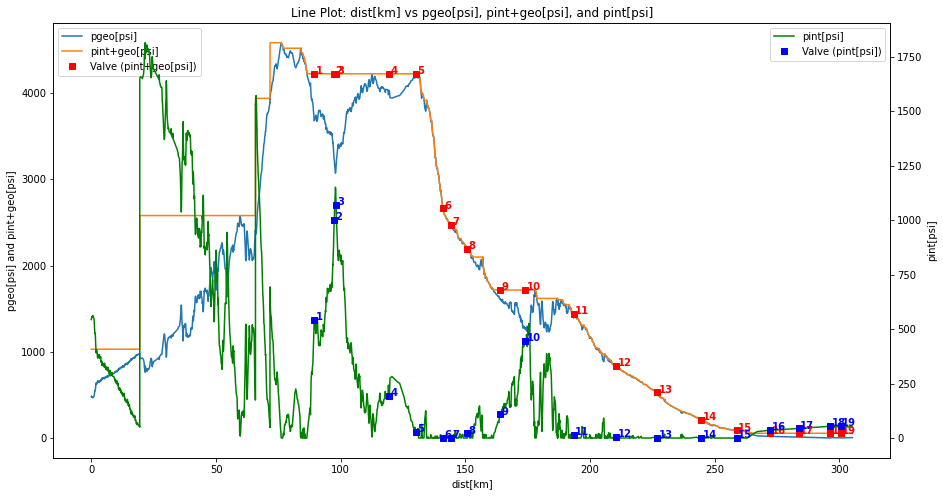

In [6]:
import matplotlib.pyplot as plt

# Create the line plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot pgeo[psi] and pint+geo[psi] on the first Y-axis
ax1.plot(df['dist[km]'], df['pgeo[psi]'], label='pgeo[psi]')
ax1.plot(df['dist[km]'], df['pint+geo[psi]'], label='pint+geo[psi]')

# Plot pint[psi] on the second Y-axis
ax2 = ax1.twinx()
ax2.plot(df['dist[km]'], df['pint[psi]'], color='g', label='pint[psi]')

# Plot the valve markers with numbers and legends over pint+geo[psi] and pint[psi]
for idx, row in valve_data.iterrows():
    ax1.plot(row['dist'], row['Interpolated pint+geo[psi]'], 'rs', label='Valve (pint+geo[psi])' if idx == 0 else None)
    ax1.text(row['dist'] + 0.5, row['Interpolated pint+geo[psi]'] + 0.5, str(row['Valve Number']), fontsize=10, fontweight='bold', color='r')
    ax2.plot(row['dist'], row['Interpolated pint[psi]'], 'bs', label='Valve (pint[psi])' if idx == 0 else None)
    ax2.text(row['dist'] + 0.5, row['Interpolated pint[psi]'] + 0.5, str(row['Valve Number']), fontsize=10, fontweight='bold', color='b')

# Set the labels and title
ax1.set_xlabel('dist[km]')
ax1.set_ylabel('pgeo[psi] and pint+geo[psi]')
ax2.set_ylabel('pint[psi]')
plt.title('Line Plot: dist[km] vs pgeo[psi], pint+geo[psi], and pint[psi]')

# Add legends for the lines and valves
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

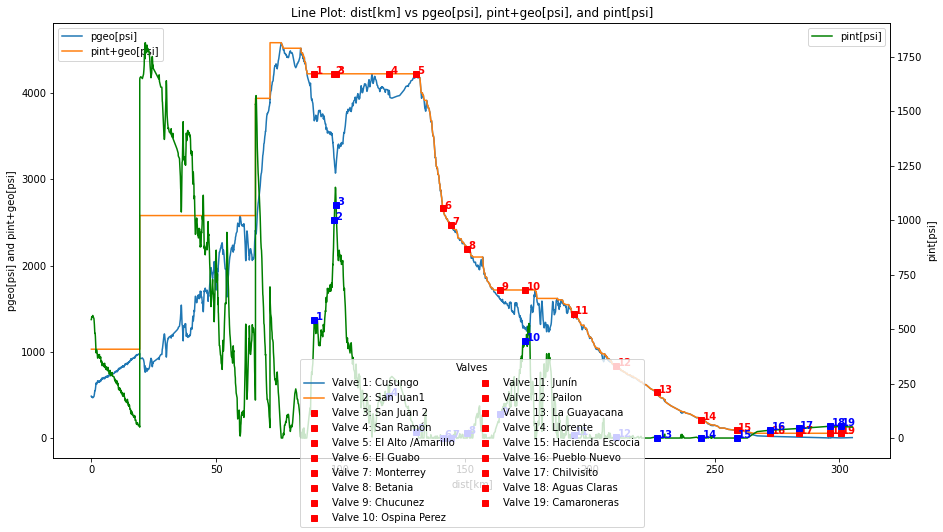

In [7]:
import matplotlib.pyplot as plt

# Create the line plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot pgeo[psi] and pint+geo[psi] on the first Y-axis
ax1.plot(df['dist[km]'], df['pgeo[psi]'], label='pgeo[psi]')
ax1.plot(df['dist[km]'], df['pint+geo[psi]'], label='pint+geo[psi]')

# Plot pint[psi] on the second Y-axis
ax2 = ax1.twinx()
ax2.plot(df['dist[km]'], df['pint[psi]'], color='g', label='pint[psi]')

# Create a list to store the valve legend labels
valve_legend_labels = []

# Plot the valve markers with numbers and legends over pint+geo[psi] and pint[psi]
for idx, row in valve_data.iterrows():
    ax1.plot(row['dist'], row['Interpolated pint+geo[psi]'], 'rs')
    ax1.text(row['dist'] + 0.5, row['Interpolated pint+geo[psi]'] + 0.5, str(row['Valve Number']), fontsize=10, fontweight='bold', color='r')
    ax2.plot(row['dist'], row['Interpolated pint[psi]'], 'bs')
    ax2.text(row['dist'] + 0.5, row['Interpolated pint[psi]'] + 0.5, str(row['Valve Number']), fontsize=10, fontweight='bold', color='b')
    valve_legend_labels.append(f"Valve {row['Valve Number']}: {row['Valve Name']}")

# Set the labels and title
ax1.set_xlabel('dist[km]')
ax1.set_ylabel('pgeo[psi] and pint+geo[psi]')
ax2.set_ylabel('pint[psi]')
plt.title('Line Plot: dist[km] vs pgeo[psi], pint+geo[psi], and pint[psi]')

# Add legends for the lines
ax1_legend = ax1.legend(loc='upper left')
ax2_legend = ax2.legend(loc='upper right')

# Add the valve legend below the plot
plt.figlegend(valve_legend_labels, loc='lower center', ncol=2, fontsize=10, title='Valves')

# Display the plot
plt.show()

<ipython-input-9-93b28a1aaf51>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors


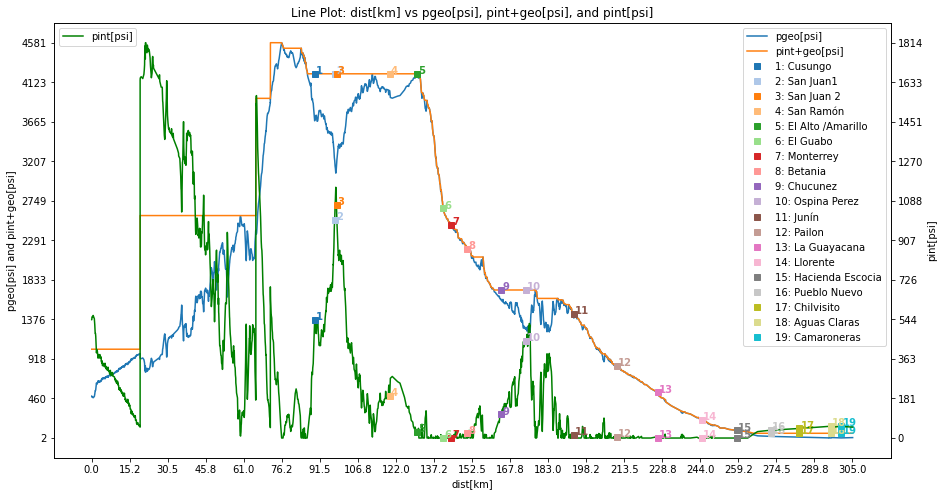

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create the line plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot pgeo[psi] and pint+geo[psi] on the first Y-axis
ax1.plot(df['dist[km]'], df['pgeo[psi]'], label='pgeo[psi]')
ax1.plot(df['dist[km]'], df['pint+geo[psi]'], label='pint+geo[psi]')

# Plot pint[psi] on the second Y-axis
ax2 = ax1.twinx()
ax2.plot(df['dist[km]'], df['pint[psi]'], color='g', label='pint[psi]')

# Plot the valve markers with numbers and legends over pint+geo[psi] and pint[psi]
colors = plt.cm.get_cmap('tab20').colors
for idx, row in valve_data.iterrows():
    ax1.plot(row['dist'], row['Interpolated pint+geo[psi]'], 's', color=colors[idx], label=f"{row['Valve Number']}: {row['Valve Name']}")
    ax1.text(row['dist'] + 0.5, row['Interpolated pint+geo[psi]'] + 0.5, str(row['Valve Number']), fontsize=10, fontweight='bold', color=colors[idx])
    ax2.plot(row['dist'], row['Interpolated pint[psi]'], 's', color=colors[idx])
    ax2.text(row['dist'] + 0.5, row['Interpolated pint[psi]'] + 0.5, str(row['Valve Number']), fontsize=10, fontweight='bold', color=colors[idx])

# Set the labels and title
ax1.set_xlabel('dist[km]')
ax1.set_ylabel('pgeo[psi] and pint+geo[psi]')
ax2.set_ylabel('pint[psi]')
plt.title('Line Plot: dist[km] vs pgeo[psi], pint+geo[psi], and pint[psi]')

# Divide X and Y axes into the specified segments
ax1.set_xticks(np.linspace(0, 305, 21))
ax1.set_yticks(np.linspace(df['pgeo[psi]'].min(), df['pgeo[psi]'].max(), 11))
ax2.set_yticks(np.linspace(df['pint[psi]'].min(), df['pint[psi]'].max(), 11))

# Add legends for the lines and valves
ax1_legend = ax1.legend(loc='upper right')
ax2_legend = ax2.legend(loc='upper left')

# Display the plot
plt.show()

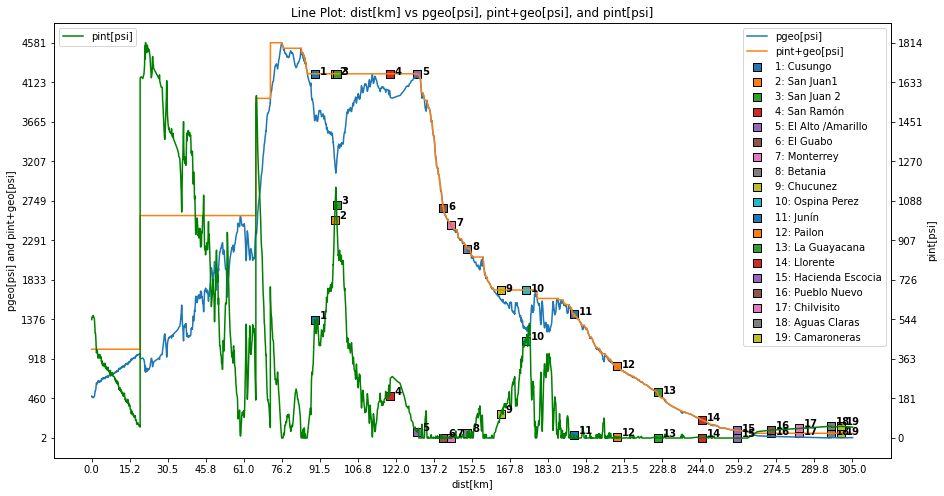

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create the line plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot pgeo[psi] and pint+geo[psi] on the first Y-axis
ax1.plot(df['dist[km]'], df['pgeo[psi]'], label='pgeo[psi]')
ax1.plot(df['dist[km]'], df['pint+geo[psi]'], label='pint+geo[psi]')

# Plot pint[psi] on the second Y-axis
ax2 = ax1.twinx()
ax2.plot(df['dist[km]'], df['pint[psi]'], color='g', label='pint[psi]')

# Plot the valve markers with numbers and legends over pint+geo[psi] and pint[psi]
for idx, row in valve_data.iterrows():
    ax1.scatter(row['dist'], row['Interpolated pint+geo[psi]'], marker="s", s=50, edgecolors='black', linewidths=1, label=f"{row['Valve Number']}: {row['Valve Name']}")
    ax1.text(row['dist'] + 2, row['Interpolated pint+geo[psi]'] + 20, str(row['Valve Number']), fontsize=10, fontweight='bold', color='k', verticalalignment='center')
    ax2.scatter(row['dist'], row['Interpolated pint[psi]'], marker="s", s=50, edgecolors='black', linewidths=1)
    ax2.text(row['dist'] + 2, row['Interpolated pint[psi]'] + 20, str(row['Valve Number']), fontsize=10, fontweight='bold', color='k', verticalalignment='center')

# Set the labels and title
ax1.set_xlabel('dist[km]')
ax1.set_ylabel('pgeo[psi] and pint+geo[psi]')
ax2.set_ylabel('pint[psi]')
plt.title('Line Plot: dist[km] vs pgeo[psi], pint+geo[psi], and pint[psi]')

# Divide X and Y axes into the specified segments
ax1.set_xticks(np.linspace(0, 305, 21))
ax1.set_yticks(np.linspace(df['pgeo[psi]'].min(), df['pgeo[psi]'].max(), 11))
ax2.set_yticks(np.linspace(df['pint[psi]'].min(), df['pint[psi]'].max(), 11))

# Add legends for the lines and valves
ax1_legend = ax1.legend(loc='upper right')
ax2_legend = ax2.legend(loc='upper left')

# Display the plot
plt.show()

In [12]:
import openpyxl

# Export the valve_data DataFrame as an xlsx file
valve_data.to_excel('valve_data_output.xlsx', index=False)

# If you are using Google Colab, you can download the file with the following command:
from google.colab import files
files.download('valve_data_output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>